In [1]:
import numpy as np
import matplotlib.pyplot as plt

from environments.pricing_env import PricingEnvironment
from learners.greedy import Greedy
from learners.ucb import UCB
from learners.normal_gamma_ts import NormalGammaTS

from data_generators.basic_generator import BasicDataGenerator
%matplotlib inline 

In [2]:
data_gen = BasicDataGenerator(filename='src/basic002.json')
prices = data_gen.get_prices()
bids = data_gen.get_bids()
margins = data_gen.get_margins()
conv_rates = data_gen.get_conversion_rates(mode='aggregate')
n_clicks = data_gen.get_daily_clicks(mode='aggregate')
costs_per_click = data_gen.get_costs_per_click(mode='aggregate')
aggr_tau = data_gen.get_future_purchases(mode='aggregate')

print(15*'-','DATA', '-'*15)
print(f'{prices=}')
print(f'{bids=}')
print(f'{margins=}')
print(f'{conv_rates=}')
print(f'{costs_per_click=}')
print(f'{n_clicks=}')
print(f'{aggr_tau=}')

sel_bid = 3
print(f'\nSelected bid: {bids[sel_bid]}({sel_bid})')
print(f'Fixed CPC: {costs_per_click[sel_bid]}')
print(f'Fixed num_clicks: {n_clicks[sel_bid]} -> {np.rint(n_clicks[sel_bid]).astype(int)}')

print('\n',15*'-','SIMULATION PARAMS', '-'*15)
T = 365
n_experiments = 50
print(f'Time horizon: {T} days')
print(f'Num. experiments: {n_experiments}')

--------------- DATA ---------------
prices=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
bids=[0.03, 0.04, 0.07, 0.1, 0.2, 0.5, 0.75, 1.0, 1.5, 2.0]
margins=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
conv_rates=array([0.204, 0.211, 0.205, 0.189, 0.176, 0.152, 0.128, 0.113, 0.097,
       0.09 ])
costs_per_click=array([0.03 , 0.04 , 0.069, 0.097, 0.189, 0.44 , 0.626, 0.796, 1.1  ,
       1.367])
n_clicks=array([ 20.018,  26.03 ,  42.358,  56.468,  91.773, 143.8  , 163.133,
       174.226, 185.61 , 190.621])
aggr_tau=array([2.85 , 2.485, 2.12 , 1.755, 1.39 , 1.025, 0.84 , 0.69 , 0.65 ,
       0.65 ])

Selected bid: 0.1(3)
Fixed CPC: 0.097
Fixed num_clicks: 56.468 -> 56

 --------------- SIMULATION PARAMS ---------------
Time horizon: 365 days
Num. experiments: 50


In [3]:
rewards_per_experiment = {}
rewards_per_experiment['Greedy'] = []
rewards_per_experiment['UCB'] = []
rewards_per_experiment['TS'] = []

In [4]:
n_arms = len(prices) 
env_params = {
        'n_arms': n_arms,
        'conversion_rates': conv_rates,
        'cost_per_click': costs_per_click[sel_bid],
        'n_clicks': np.rint(n_clicks[sel_bid]).astype(int),
        'margins': margins, 
        'tau': aggr_tau
    }
for e in range(n_experiments):
    # Initialization of the learners to test and their related environment:
    # the list is composed of tuples (Learner, Environment)
    test_instances = [
        ("Greedy", Greedy(n_arms), PricingEnvironment(**env_params)),
        ("UCB", UCB(n_arms), PricingEnvironment(**env_params)),
        #("TS", NormalGammaTS(n_arms), PricingEnvironment(**env_params))
    ]
    
    for t in range(T):
        for name, learner, env in test_instances:
            pulled_arm = learner.pull_arm()
            daily_reward = env.day_round(pulled_arm)
            learner.update(pulled_arm, daily_reward)
            if t % 10 == 0 and name != 'Greedy':
                print(f'[exp#{e}] t: {t}\n{name}\n{pulled_arm=}\n{daily_reward=}')
                print(30*'-')

    for learner_name, learner, _ in test_instances:
        rewards_per_experiment[learner_name].append(learner.collected_rewards)

[exp#0] t: 0
UCB
pulled_arm=0
daily_reward=680.339393203242
------------------------------
[exp#0] t: 10
UCB
pulled_arm=9
daily_reward=448.1008794865287
------------------------------
[exp#0] t: 20
UCB
pulled_arm=0
daily_reward=570.6435815210541
------------------------------
[exp#0] t: 30
UCB
pulled_arm=0
daily_reward=786.7271492436448
------------------------------
[exp#0] t: 40
UCB
pulled_arm=0
daily_reward=874.4405828696526
------------------------------
[exp#0] t: 50
UCB
pulled_arm=0
daily_reward=554.0539323819845
------------------------------
[exp#0] t: 60
UCB
pulled_arm=0
daily_reward=899.5255798318108
------------------------------
[exp#0] t: 70
UCB
pulled_arm=0
daily_reward=268.38114846679173
------------------------------
[exp#0] t: 80
UCB
pulled_arm=0
daily_reward=887.9451442610093
------------------------------
[exp#0] t: 90
UCB
pulled_arm=0
daily_reward=726.7231406094551
------------------------------
[exp#0] t: 100
UCB
pulled_arm=0
daily_reward=524.5195722894399
--------

[exp#2] t: 160
UCB
pulled_arm=0
daily_reward=717.3606231586773
------------------------------
[exp#2] t: 170
UCB
pulled_arm=0
daily_reward=451.4007512021991
------------------------------
[exp#2] t: 180
UCB
pulled_arm=0
daily_reward=545.7932303870948
------------------------------
[exp#2] t: 190
UCB
pulled_arm=0
daily_reward=857.4163546690211
------------------------------
[exp#2] t: 200
UCB
pulled_arm=0
daily_reward=806.2799528205478
------------------------------
[exp#2] t: 210
UCB
pulled_arm=0
daily_reward=832.0984582202168
------------------------------
[exp#2] t: 220
UCB
pulled_arm=0
daily_reward=833.3665236885851
------------------------------
[exp#2] t: 230
UCB
pulled_arm=0
daily_reward=699.6135242879966
------------------------------
[exp#2] t: 240
UCB
pulled_arm=0
daily_reward=584.9936636480363
------------------------------
[exp#2] t: 250
UCB
pulled_arm=0
daily_reward=836.0713292262344
------------------------------
[exp#2] t: 260
UCB
pulled_arm=0
daily_reward=777.89177172724

daily_reward=618.457070432227
------------------------------
[exp#4] t: 350
UCB
pulled_arm=0
daily_reward=531.3538163956518
------------------------------
[exp#4] t: 360
UCB
pulled_arm=0
daily_reward=589.4918028531313
------------------------------
[exp#5] t: 0
UCB
pulled_arm=0
daily_reward=568.5167111351693
------------------------------
[exp#5] t: 10
UCB
pulled_arm=9
daily_reward=316.4396777501123
------------------------------
[exp#5] t: 20
UCB
pulled_arm=0
daily_reward=802.2263948553873
------------------------------
[exp#5] t: 30
UCB
pulled_arm=0
daily_reward=408.7402600286972
------------------------------
[exp#5] t: 40
UCB
pulled_arm=0
daily_reward=381.3961681878252
------------------------------
[exp#5] t: 50
UCB
pulled_arm=0
daily_reward=696.4164216397794
------------------------------
[exp#5] t: 60
UCB
pulled_arm=0
daily_reward=943.4683128155623
------------------------------
[exp#5] t: 70
UCB
pulled_arm=0
daily_reward=619.0069776412718
------------------------------
[exp#5] 

[exp#7] t: 110
UCB
pulled_arm=0
daily_reward=471.45932303858933
------------------------------
[exp#7] t: 120
UCB
pulled_arm=0
daily_reward=391.5651452800228
------------------------------
[exp#7] t: 130
UCB
pulled_arm=0
daily_reward=730.0479930648702
------------------------------
[exp#7] t: 140
UCB
pulled_arm=0
daily_reward=886.8198652187198
------------------------------
[exp#7] t: 150
UCB
pulled_arm=0
daily_reward=643.7438007963847
------------------------------
[exp#7] t: 160
UCB
pulled_arm=0
daily_reward=777.3677099127308
------------------------------
[exp#7] t: 170
UCB
pulled_arm=0
daily_reward=607.5916125994822
------------------------------
[exp#7] t: 180
UCB
pulled_arm=0
daily_reward=503.6280712514484
------------------------------
[exp#7] t: 190
UCB
pulled_arm=0
daily_reward=783.0510208641492
------------------------------
[exp#7] t: 200
UCB
pulled_arm=0
daily_reward=993.705995490004
------------------------------
[exp#7] t: 210
UCB
pulled_arm=0
daily_reward=977.99519629257

daily_reward=836.2439456903434
------------------------------
[exp#9] t: 290
UCB
pulled_arm=0
daily_reward=430.32759593121045
------------------------------
[exp#9] t: 300
UCB
pulled_arm=0
daily_reward=494.21248270743337
------------------------------
[exp#9] t: 310
UCB
pulled_arm=0
daily_reward=606.8012844583084
------------------------------
[exp#9] t: 320
UCB
pulled_arm=0
daily_reward=348.5787800239362
------------------------------
[exp#9] t: 330
UCB
pulled_arm=0
daily_reward=534.36202667354
------------------------------
[exp#9] t: 340
UCB
pulled_arm=0
daily_reward=610.3274793440104
------------------------------
[exp#9] t: 350
UCB
pulled_arm=0
daily_reward=591.7561296509368
------------------------------
[exp#9] t: 360
UCB
pulled_arm=0
daily_reward=785.4554194313141
------------------------------
[exp#10] t: 0
UCB
pulled_arm=0
daily_reward=549.6973202606109
------------------------------
[exp#10] t: 10
UCB
pulled_arm=9
daily_reward=215.5250767797269
------------------------------

[exp#12] t: 90
UCB
pulled_arm=0
daily_reward=842.5202000628066
------------------------------
[exp#12] t: 100
UCB
pulled_arm=0
daily_reward=752.9826071225598
------------------------------
[exp#12] t: 110
UCB
pulled_arm=0
daily_reward=612.6191058676438
------------------------------
[exp#12] t: 120
UCB
pulled_arm=0
daily_reward=681.4507636108754
------------------------------
[exp#12] t: 130
UCB
pulled_arm=0
daily_reward=367.3997706529256
------------------------------
[exp#12] t: 140
UCB
pulled_arm=0
daily_reward=671.51745881074
------------------------------
[exp#12] t: 150
UCB
pulled_arm=0
daily_reward=695.1528603718175
------------------------------
[exp#12] t: 160
UCB
pulled_arm=0
daily_reward=982.859848226002
------------------------------
[exp#12] t: 170
UCB
pulled_arm=0
daily_reward=823.6789721611844
------------------------------
[exp#12] t: 180
UCB
pulled_arm=0
daily_reward=940.7698919423192
------------------------------
[exp#12] t: 190
UCB
pulled_arm=0
daily_reward=595.8082

[exp#14] t: 260
UCB
pulled_arm=0
daily_reward=614.1184613583249
------------------------------
[exp#14] t: 270
UCB
pulled_arm=0
daily_reward=737.3831636495004
------------------------------
[exp#14] t: 280
UCB
pulled_arm=0
daily_reward=415.18984627248244
------------------------------
[exp#14] t: 290
UCB
pulled_arm=0
daily_reward=714.9495669592732
------------------------------
[exp#14] t: 300
UCB
pulled_arm=0
daily_reward=621.9554066940723
------------------------------
[exp#14] t: 310
UCB
pulled_arm=0
daily_reward=675.2229159286135
------------------------------
[exp#14] t: 320
UCB
pulled_arm=0
daily_reward=616.5643758693939
------------------------------
[exp#14] t: 330
UCB
pulled_arm=0
daily_reward=405.1588354915901
------------------------------
[exp#14] t: 340
UCB
pulled_arm=0
daily_reward=716.0682360646381
------------------------------
[exp#14] t: 350
UCB
pulled_arm=0
daily_reward=849.9272902649548
------------------------------
[exp#14] t: 360
UCB
pulled_arm=0
daily_reward=580

[exp#17] t: 40
UCB
pulled_arm=0
daily_reward=490.0562841620078
------------------------------
[exp#17] t: 50
UCB
pulled_arm=0
daily_reward=669.6391643757622
------------------------------
[exp#17] t: 60
UCB
pulled_arm=0
daily_reward=1195.2270833178502
------------------------------
[exp#17] t: 70
UCB
pulled_arm=0
daily_reward=525.783068885479
------------------------------
[exp#17] t: 80
UCB
pulled_arm=0
daily_reward=699.279562162787
------------------------------
[exp#17] t: 90
UCB
pulled_arm=0
daily_reward=643.2738964165364
------------------------------
[exp#17] t: 100
UCB
pulled_arm=0
daily_reward=777.7988203658247
------------------------------
[exp#17] t: 110
UCB
pulled_arm=0
daily_reward=779.2271442309138
------------------------------
[exp#17] t: 120
UCB
pulled_arm=0
daily_reward=633.7376420877632
------------------------------
[exp#17] t: 130
UCB
pulled_arm=0
daily_reward=395.9213523501927
------------------------------
[exp#17] t: 140
UCB
pulled_arm=0
daily_reward=654.9481585

[exp#19] t: 190
UCB
pulled_arm=0
daily_reward=629.182509442079
------------------------------
[exp#19] t: 200
UCB
pulled_arm=0
daily_reward=1141.0641298767312
------------------------------
[exp#19] t: 210
UCB
pulled_arm=0
daily_reward=1131.4411352478232
------------------------------
[exp#19] t: 220
UCB
pulled_arm=0
daily_reward=943.5331416736763
------------------------------
[exp#19] t: 230
UCB
pulled_arm=0
daily_reward=829.5139078270864
------------------------------
[exp#19] t: 240
UCB
pulled_arm=0
daily_reward=579.4190860641897
------------------------------
[exp#19] t: 250
UCB
pulled_arm=0
daily_reward=756.6459902912309
------------------------------
[exp#19] t: 260
UCB
pulled_arm=0
daily_reward=461.3969344591694
------------------------------
[exp#19] t: 270
UCB
pulled_arm=0
daily_reward=612.4362335608143
------------------------------
[exp#19] t: 280
UCB
pulled_arm=0
daily_reward=601.5099662363148
------------------------------
[exp#19] t: 290
UCB
pulled_arm=0
daily_reward=581

[exp#21] t: 340
UCB
pulled_arm=0
daily_reward=586.2288221594973
------------------------------
[exp#21] t: 350
UCB
pulled_arm=0
daily_reward=598.8239741096392
------------------------------
[exp#21] t: 360
UCB
pulled_arm=0
daily_reward=850.7790456019954
------------------------------
[exp#22] t: 0
UCB
pulled_arm=0
daily_reward=605.8020822584785
------------------------------
[exp#22] t: 10
UCB
pulled_arm=9
daily_reward=256.1594380629545
------------------------------
[exp#22] t: 20
UCB
pulled_arm=0
daily_reward=978.4466994370403
------------------------------
[exp#22] t: 30
UCB
pulled_arm=0
daily_reward=663.6809782569096
------------------------------
[exp#22] t: 40
UCB
pulled_arm=0
daily_reward=586.3654481951907
------------------------------
[exp#22] t: 50
UCB
pulled_arm=0
daily_reward=619.775445793731
------------------------------
[exp#22] t: 60
UCB
pulled_arm=0
daily_reward=861.8956353179697
------------------------------
[exp#22] t: 70
UCB
pulled_arm=0
daily_reward=639.1417027283

daily_reward=877.4002060514254
------------------------------
[exp#24] t: 150
UCB
pulled_arm=0
daily_reward=740.2140517384681
------------------------------
[exp#24] t: 160
UCB
pulled_arm=0
daily_reward=561.9434416194168
------------------------------
[exp#24] t: 170
UCB
pulled_arm=0
daily_reward=911.1425257181156
------------------------------
[exp#24] t: 180
UCB
pulled_arm=0
daily_reward=783.9669747318197
------------------------------
[exp#24] t: 190
UCB
pulled_arm=0
daily_reward=804.3569703702033
------------------------------
[exp#24] t: 200
UCB
pulled_arm=0
daily_reward=850.2882266143479
------------------------------
[exp#24] t: 210
UCB
pulled_arm=0
daily_reward=824.6784266432821
------------------------------
[exp#24] t: 220
UCB
pulled_arm=0
daily_reward=700.1587047739149
------------------------------
[exp#24] t: 230
UCB
pulled_arm=0
daily_reward=596.8477047650149
------------------------------
[exp#24] t: 240
UCB
pulled_arm=0
daily_reward=728.9425222297498
-------------------

[exp#26] t: 300
UCB
pulled_arm=0
daily_reward=519.7483014078043
------------------------------
[exp#26] t: 310
UCB
pulled_arm=0
daily_reward=441.73955526161586
------------------------------
[exp#26] t: 320
UCB
pulled_arm=0
daily_reward=405.8141235710997
------------------------------
[exp#26] t: 330
UCB
pulled_arm=0
daily_reward=709.5424291410347
------------------------------
[exp#26] t: 340
UCB
pulled_arm=0
daily_reward=724.3183395176413
------------------------------
[exp#26] t: 350
UCB
pulled_arm=0
daily_reward=499.15570969856026
------------------------------
[exp#26] t: 360
UCB
pulled_arm=0
daily_reward=462.93081745876793
------------------------------
[exp#27] t: 0
UCB
pulled_arm=0
daily_reward=840.5559882628804
------------------------------
[exp#27] t: 10
UCB
pulled_arm=9
daily_reward=204.52099342114832
------------------------------
[exp#27] t: 20
UCB
pulled_arm=0
daily_reward=984.5035043606181
------------------------------
[exp#27] t: 30
UCB
pulled_arm=0
daily_reward=864.8

daily_reward=976.4124037994587
------------------------------
[exp#29] t: 90
UCB
pulled_arm=1
daily_reward=383.182390794262
------------------------------
[exp#29] t: 100
UCB
pulled_arm=1
daily_reward=535.1487630548925
------------------------------
[exp#29] t: 110
UCB
pulled_arm=1
daily_reward=665.5471207535758
------------------------------
[exp#29] t: 120
UCB
pulled_arm=1
daily_reward=864.7843246424754
------------------------------
[exp#29] t: 130
UCB
pulled_arm=1
daily_reward=563.543975176905
------------------------------
[exp#29] t: 140
UCB
pulled_arm=1
daily_reward=506.1450760898615
------------------------------
[exp#29] t: 150
UCB
pulled_arm=1
daily_reward=590.1911762314755
------------------------------
[exp#29] t: 160
UCB
pulled_arm=1
daily_reward=711.8006844567353
------------------------------
[exp#29] t: 170
UCB
pulled_arm=1
daily_reward=554.0087337089994
------------------------------
[exp#29] t: 180
UCB
pulled_arm=1
daily_reward=606.1114909914426
----------------------

[exp#31] t: 270
UCB
pulled_arm=1
daily_reward=570.6332974257473
------------------------------
[exp#31] t: 280
UCB
pulled_arm=1
daily_reward=813.9837176270021
------------------------------
[exp#31] t: 290
UCB
pulled_arm=1
daily_reward=441.153061704066
------------------------------
[exp#31] t: 300
UCB
pulled_arm=1
daily_reward=893.5056048137851
------------------------------
[exp#31] t: 310
UCB
pulled_arm=1
daily_reward=693.8884203741718
------------------------------
[exp#31] t: 320
UCB
pulled_arm=1
daily_reward=619.939769710961
------------------------------
[exp#31] t: 330
UCB
pulled_arm=1
daily_reward=380.55545956392854
------------------------------
[exp#31] t: 340
UCB
pulled_arm=1
daily_reward=762.6457267161804
------------------------------
[exp#31] t: 350
UCB
pulled_arm=1
daily_reward=554.8958675695835
------------------------------
[exp#31] t: 360
UCB
pulled_arm=1
daily_reward=723.4204479898417
------------------------------
[exp#32] t: 0
UCB
pulled_arm=0
daily_reward=688.650

[exp#34] t: 50
UCB
pulled_arm=0
daily_reward=792.6964162389376
------------------------------
[exp#34] t: 60
UCB
pulled_arm=0
daily_reward=369.2707183429983
------------------------------
[exp#34] t: 70
UCB
pulled_arm=0
daily_reward=475.01944970941156
------------------------------
[exp#34] t: 80
UCB
pulled_arm=0
daily_reward=433.75544961554937
------------------------------
[exp#34] t: 90
UCB
pulled_arm=0
daily_reward=700.7668604880312
------------------------------
[exp#34] t: 100
UCB
pulled_arm=0
daily_reward=581.33352877362
------------------------------
[exp#34] t: 110
UCB
pulled_arm=0
daily_reward=678.4059659235497
------------------------------
[exp#34] t: 120
UCB
pulled_arm=0
daily_reward=515.4821711292388
------------------------------
[exp#34] t: 130
UCB
pulled_arm=0
daily_reward=722.1735453780409
------------------------------
[exp#34] t: 140
UCB
pulled_arm=0
daily_reward=456.7668858338981
------------------------------
[exp#34] t: 150
UCB
pulled_arm=0
daily_reward=1298.5302

[exp#36] t: 220
UCB
pulled_arm=0
daily_reward=336.05716683258004
------------------------------
[exp#36] t: 230
UCB
pulled_arm=0
daily_reward=436.3029136012715
------------------------------
[exp#36] t: 240
UCB
pulled_arm=0
daily_reward=759.110473068094
------------------------------
[exp#36] t: 250
UCB
pulled_arm=0
daily_reward=327.2439954421545
------------------------------
[exp#36] t: 260
UCB
pulled_arm=0
daily_reward=691.8868134209392
------------------------------
[exp#36] t: 270
UCB
pulled_arm=0
daily_reward=412.9969947092461
------------------------------
[exp#36] t: 280
UCB
pulled_arm=0
daily_reward=394.7265764580792
------------------------------
[exp#36] t: 290
UCB
pulled_arm=0
daily_reward=805.6073817740655
------------------------------
[exp#36] t: 300
UCB
pulled_arm=0
daily_reward=580.9116442014496
------------------------------
[exp#36] t: 310
UCB
pulled_arm=0
daily_reward=699.0083070315083
------------------------------
[exp#36] t: 320
UCB
pulled_arm=0
daily_reward=714.

[exp#39] t: 10
UCB
pulled_arm=9
daily_reward=117.1283948079473
------------------------------
[exp#39] t: 20
UCB
pulled_arm=0
daily_reward=818.0437960251356
------------------------------
[exp#39] t: 30
UCB
pulled_arm=0
daily_reward=604.4053876654441
------------------------------
[exp#39] t: 40
UCB
pulled_arm=0
daily_reward=413.5058124920876
------------------------------
[exp#39] t: 50
UCB
pulled_arm=0
daily_reward=310.9846674470086
------------------------------
[exp#39] t: 60
UCB
pulled_arm=0
daily_reward=354.11595448084574
------------------------------
[exp#39] t: 70
UCB
pulled_arm=0
daily_reward=560.5969014186754
------------------------------
[exp#39] t: 80
UCB
pulled_arm=0
daily_reward=423.73231146899025
------------------------------
[exp#39] t: 90
UCB
pulled_arm=0
daily_reward=852.8142781151205
------------------------------
[exp#39] t: 100
UCB
pulled_arm=0
daily_reward=547.6148977845928
------------------------------
[exp#39] t: 110
UCB
pulled_arm=0
daily_reward=664.0536472

[exp#41] t: 170
UCB
pulled_arm=0
daily_reward=512.1259499231246
------------------------------
[exp#41] t: 180
UCB
pulled_arm=0
daily_reward=853.5934670006516
------------------------------
[exp#41] t: 190
UCB
pulled_arm=0
daily_reward=1031.4700356674566
------------------------------
[exp#41] t: 200
UCB
pulled_arm=0
daily_reward=643.2378928102073
------------------------------
[exp#41] t: 210
UCB
pulled_arm=0
daily_reward=284.80384636363453
------------------------------
[exp#41] t: 220
UCB
pulled_arm=0
daily_reward=403.41779664625585
------------------------------
[exp#41] t: 230
UCB
pulled_arm=0
daily_reward=671.7182706528934
------------------------------
[exp#41] t: 240
UCB
pulled_arm=0
daily_reward=720.2430869308798
------------------------------
[exp#41] t: 250
UCB
pulled_arm=0
daily_reward=882.6657437309136
------------------------------
[exp#41] t: 260
UCB
pulled_arm=0
daily_reward=662.4630572650393
------------------------------
[exp#41] t: 270
UCB
pulled_arm=0
daily_reward=6

[exp#43] t: 320
UCB
pulled_arm=0
daily_reward=513.006037842868
------------------------------
[exp#43] t: 330
UCB
pulled_arm=0
daily_reward=959.381716966488
------------------------------
[exp#43] t: 340
UCB
pulled_arm=0
daily_reward=645.304511300296
------------------------------
[exp#43] t: 350
UCB
pulled_arm=0
daily_reward=874.4325017447824
------------------------------
[exp#43] t: 360
UCB
pulled_arm=0
daily_reward=734.3654524258967
------------------------------
[exp#44] t: 0
UCB
pulled_arm=0
daily_reward=786.0663810987915
------------------------------
[exp#44] t: 10
UCB
pulled_arm=9
daily_reward=293.8018240005325
------------------------------
[exp#44] t: 20
UCB
pulled_arm=0
daily_reward=649.8786712369815
------------------------------
[exp#44] t: 30
UCB
pulled_arm=0
daily_reward=478.76860070175957
------------------------------
[exp#44] t: 40
UCB
pulled_arm=0
daily_reward=586.9045798358011
------------------------------
[exp#44] t: 50
UCB
pulled_arm=0
daily_reward=833.046627766

[exp#46] t: 120
UCB
pulled_arm=0
daily_reward=631.2291432130241
------------------------------
[exp#46] t: 130
UCB
pulled_arm=0
daily_reward=588.1308201645879
------------------------------
[exp#46] t: 140
UCB
pulled_arm=0
daily_reward=817.1702580541828
------------------------------
[exp#46] t: 150
UCB
pulled_arm=0
daily_reward=708.4750872330897
------------------------------
[exp#46] t: 160
UCB
pulled_arm=0
daily_reward=644.2742413673842
------------------------------
[exp#46] t: 170
UCB
pulled_arm=0
daily_reward=353.21528681254904
------------------------------
[exp#46] t: 180
UCB
pulled_arm=0
daily_reward=453.2518605047323
------------------------------
[exp#46] t: 190
UCB
pulled_arm=0
daily_reward=678.934519582856
------------------------------
[exp#46] t: 200
UCB
pulled_arm=0
daily_reward=634.6141184558583
------------------------------
[exp#46] t: 210
UCB
pulled_arm=0
daily_reward=546.2155568021639
------------------------------
[exp#46] t: 220
UCB
pulled_arm=0
daily_reward=584.

[exp#48] t: 270
UCB
pulled_arm=0
daily_reward=652.3940394136449
------------------------------
[exp#48] t: 280
UCB
pulled_arm=0
daily_reward=339.20528081592954
------------------------------
[exp#48] t: 290
UCB
pulled_arm=0
daily_reward=578.8988935409432
------------------------------
[exp#48] t: 300
UCB
pulled_arm=0
daily_reward=632.694559320985
------------------------------
[exp#48] t: 310
UCB
pulled_arm=0
daily_reward=557.0801580462505
------------------------------
[exp#48] t: 320
UCB
pulled_arm=0
daily_reward=625.9564402012703
------------------------------
[exp#48] t: 330
UCB
pulled_arm=0
daily_reward=515.3611713518133
------------------------------
[exp#48] t: 340
UCB
pulled_arm=0
daily_reward=440.4793349303674
------------------------------
[exp#48] t: 350
UCB
pulled_arm=0
daily_reward=465.61187907923215
------------------------------
[exp#48] t: 360
UCB
pulled_arm=0
daily_reward=418.1207926149638
------------------------------
[exp#49] t: 0
UCB
pulled_arm=0
daily_reward=525.5

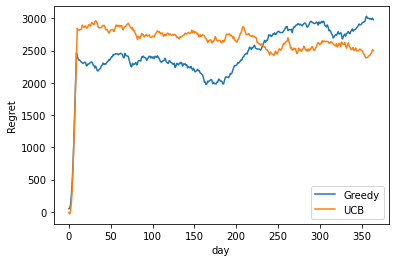

In [5]:
opt_per_round = test_instances[0][2].get_opt()
opt_per_day = opt_per_round * env_params['n_clicks']

#opt = [opt_per_day]*T

# Plotting the results
plt.figure()
plt.ylabel("Regret")
plt.xlabel("day")
plt.plot(np.cumsum(np.mean(opt_per_day - rewards_per_experiment['Greedy'], axis=0)))
plt.plot(np.cumsum(np.mean(opt_per_day - rewards_per_experiment['UCB'], axis=0)))
#plt.plot(np.cumsum(np.mean(opt_per_day - rewards_per_experiment['TS'], axis=0)))
plt.legend(["Greedy", "UCB", "TS"])

In [6]:
opt_per_round * env_params['n_clicks']

654.304

In [7]:
env_params['n_clicks']

56